In [112]:
import sys
del sys.modules["get_data"]

In [2]:
import numpy as np
from get_data import xor_data
from get_data import donut_data
from get_data import fig_data
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from scipy.stats import multivariate_normal as mvn
from scipy.stats import norm
from scipy import stats


class NaiveBayes(object):
    
        
    def fit(self,X,Y,smoothing=0.001):
        self.X=X
        self.Y=Y
        self.label=set(Y)
        self.prior=[]
        self.mu=[]
        self.cov_=[]
        
        #mu=np.zeros(len(label))
        
        for i in range(0,10):    #label:
            
            xi=X[np.round(Y)==i]
            yi=Y[np.round(Y)==i]
            
            t1=np.mean(xi,axis=0)   #t1=np.mean(xi,axis=0)   #t1=np.median(xi,axis=0)   better
            self.mu.append(t1)
            #t2=np.var(xi,axis=0)+smoothing
            t2=np.cov(xi.T,rowvar=True)+np.eye(np.shape(xi)[1])*smoothing      # when observ. becomecol, var become row or np.cov(xi,rowvar=False) when observation rows, var in col
            self.cov_.append(t2)
            #self.var[i]=np.array(np.var(xi,axis=0)+smoothing)
            t3=float(len(yi)/len(Y))
            self.prior.append(t3)
            #self.prior[i]=float(len(yi)/len(Y))     #a 784 element array

            
    def accuracy(self,X,Y):
        YP=self.predict(X)
        return np.mean(YP==Y)            
            
       
    def predict(self,X):
        
        Y_pred=np.zeros(len(X))
        result=np.zeros((len(X),len(self.label)))

#        for i,xx in enumerate(X):   #pick a point loop over all domain for distances
            
#            for j in range(0,10):   #self.label:
                
#                mean_=self.mu[int(j)]
#                var_=self.var[int(j)]
                
#                result[i,int(j)]=mvn.logpdf(xx,mean=mean_,cov=var_)+np.log(self.prior[int(j)])
                
                
            
        for j in range(0,10):   #self.label:

            mean_=self.mu[int(j)]
            covr_=self.cov_[int(j)]

            result[:,int(j)]=mvn.logpdf(X,mean=mean_,cov=covr_)+np.log(self.prior[int(j)])
                
                
        Y_pred=np.argmax(result,axis=1)   # return loc of maximum accurance of probability per category      
                                           #---> axis 1 across this direction, could also loop for max
        return Y_pred

    def accuracy(self,X,Y):
        YP=self.predict(X)
        return np.mean(np.round(YP)==np.round(Y))


if __name__=='__main__':
    

    
    print('Read data')
    Xtrain,Ytrain,Xtest,Ytest=fig_data(limit=2000,ratio=0.5,seed=100)
    print(len(Xtrain),len(Ytrain),len(Xtest),len(Ytest))
    print(np.max(Xtrain),np.max(Ytrain))
    print(np.min(Xtrain),np.min(Ytrain))
    NB=NaiveBayes()
    NB.fit(Xtrain,Ytrain)
    print('Fit')
    print('Train accuracy',NB.accuracy(Xtrain,Ytrain))
    print('Test accuracy',NB.accuracy(Xtest,Ytest))

    

#median  of X in gaussian  
#Train accuracy 0.865  0.864       since real population is skewed better to put median of population as mean of gaussian
#Test accuracy 0.803   0.895

#Mean of X in gaussian 
#Train accuracy 0.837  0.838     
#Test accuracy 0.777   0.779

Read data
1000 1000 1000 1000
1.0 9.0
0.0 0.0
Fit
Train accuracy 1.0
Test accuracy 0.924


C:\Users\niava\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\niava\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


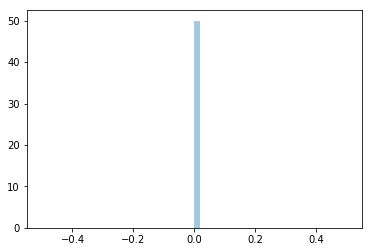

In [63]:
import seaborn as sns
sns.distplot(Xtrain[:,15])

In [82]:
np.unravel_index(np.argmax(Xtrain, axis=None), Xtrain.shape)

(1, 541)

In [83]:
Xtrain[1,541]

1.0

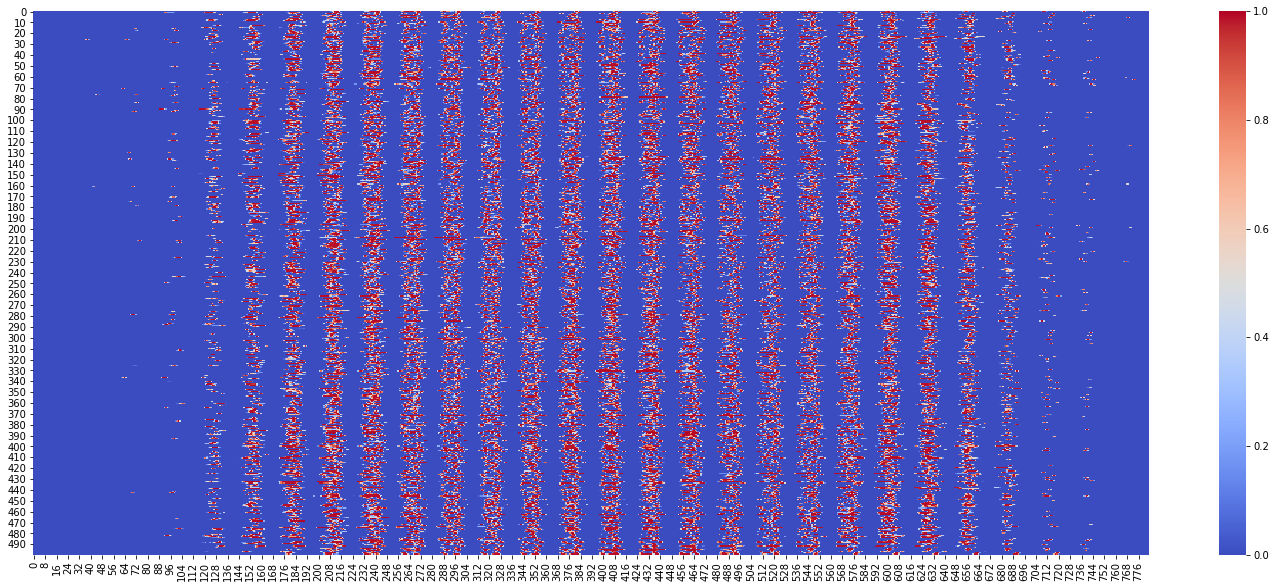

In [98]:
plt.figure(figsize=(25,10))
sns.heatmap(Xtrain,cmap='coolwarm')   #blue spaces are due to each line of image, going to next, since is flattened here

C:\Users\niava\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


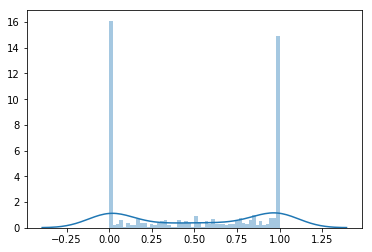

In [95]:
sns.distplot(Xtrain[:,603],bins=50)

In [97]:
print(np.mean(Xtrain[:,603]))
print(np.var(Xtrain[:,603]))

0.5035607843137255
0.18373421816224528


C:\Users\niava\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\niava\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


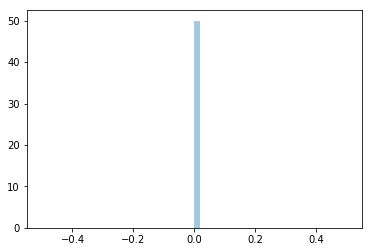

In [99]:
sns.distplot(Xtrain[:,392],bins=50)

In [100]:
 x = np.linspace(norm.ppf(0.01),
...                 norm.ppf(0.99), 100)

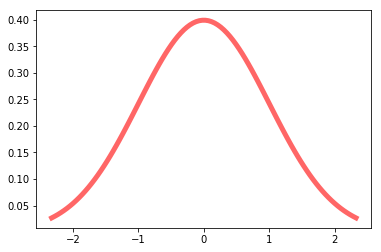

In [102]:
plt.plot(x, norm.pdf(x),
...        'r-', lw=5, alpha=0.6, label='norm pdf')

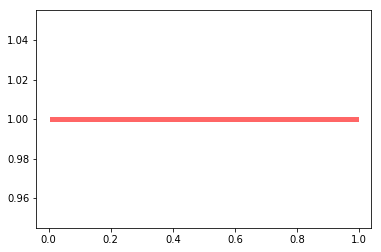

In [106]:
from scipy.stats import uniform
x = np.linspace(uniform.ppf(0.01),uniform.ppf(0.99), 100)
plt.plot(x, uniform.pdf(x),'r-', lw=5, alpha=0.6, label='uniform pdf')

In [128]:
mode,count=stats.mode(Xtrain[:,408])

In [129]:
mode


array([0.])

In [130]:
count

array([287])

In [132]:
x=np.eye(2)

In [133]:
list_=[]
list_.append(x)
list_.append(x)

In [134]:
list_

[array([[1., 0.],
        [0., 1.]]), array([[1., 0.],
        [0., 1.]])]

In [135]:
list_[0]

array([[1., 0.],
       [0., 1.]])

In [136]:
list_[1]

array([[1., 0.],
       [0., 1.]])